In [114]:
import os
import nltk
import nltk.corpus
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.tokenize import blankline_tokenize
from nltk.util import bigrams, trigrams, ngrams
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from nltk import ne_chunk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

In [90]:
script = open(r"C:\Users\Anmol\Desktop\movie_review_project_db\star-wars-movie-scripts\SW_EpisodeIV.txt").read()
tokens = word_tokenize(script)
len(tokens)

22605

In [93]:
punctuations = re.compile(r'[-,?!,:;()|0-9]')

In [94]:
tokens_post_punct = []
for words in tokens_lemmatized:
    word = punctuations.sub("", words)
    if len(word)>0:
        tokens_post_punct.append(word)
len(tokens_post_punct)

20401

In [100]:
fdist = FreqDist(tokens_post_punct)

In [101]:
print(fdist)

<FreqDist with 1980 samples and 20401 outcomes>


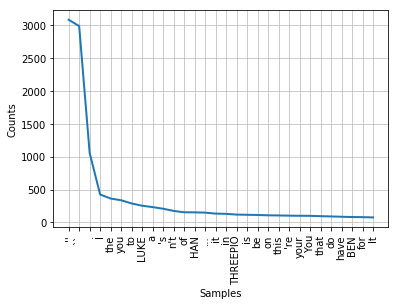

In [102]:
fdist.plot(30,cumulative=False)
plt.show()

In [105]:
stop_words=set(stopwords.words("english"))
tokens_noStopWords = []
for w in tokens_post_punct:
    if w not in stop_words:
        tokens_noStopWords.append(w)
print(len(tokens_post_punct))
print(len(tokens_noStopWords))

20401
15832


In [106]:
lst = LancasterStemmer()
lemmatizer = WordNetLemmatizer()
tokens_stemmed = []
tokens_lemmatized = []

In [107]:
for words in tokens_noStopWords:
    tokens_stemmed.append(lst.stem(words))
for words in tokens_noStopWords:
    tokens_lemmatized.append(lemmatizer.lemmatize(words))

In [110]:
data = pd.read_csv(r"C:\Users\Anmol\Desktop\movie_review_project_db\kaggle movie review data set\sentiment-analysis-on-movie-reviews\train.tsv", sep='\t')
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [112]:
data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

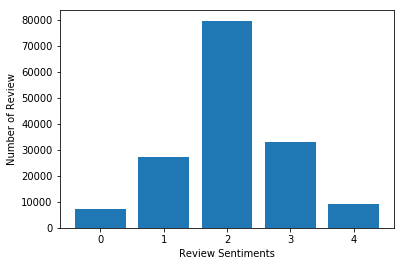

In [113]:
Sentiment_count = data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [115]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['Phrase'])

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['Sentiment'], test_size=0.30, random_state=1)

In [120]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [138]:
clf = MultinomialNB().fit(X_train, y_train)
prediction= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, prediction))

MultinomialNB Accuracy: 0.5853090691614337


In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data['Phrase'])

In [140]:
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, data['Sentiment'], test_size=0.3, random_state=1)

In [141]:
clf = MultinomialNB().fit(X_train, y_train)
prediction = clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, prediction))

MultinomialNB Accuracy: 0.5853090691614337


In [145]:
print(prediction)

[2 1 2 ... 2 3 2]


In [146]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [148]:
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))
print(accuracy_score(y_test, prediction))

[[   55   824  1206    33     1]
 [   32  2023  6045   177     0]
 [   11   952 21390  1444    19]
 [    0    98  5959  3813    66]
 [    0    11   977  1560   122]]
              precision    recall  f1-score   support

           0       0.56      0.03      0.05      2119
           1       0.52      0.24      0.33      8277
           2       0.60      0.90      0.72     23816
           3       0.54      0.38      0.45      9936
           4       0.59      0.05      0.08      2670

   micro avg       0.59      0.59      0.59     46818
   macro avg       0.56      0.32      0.33     46818
weighted avg       0.57      0.59      0.53     46818

0.5853090691614337
